In [32]:
import netCDF4 as nc
import matplotlib.pyplot as pl
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib.ticker import LogLocator
%matplotlib inline

In [33]:
from matplotlib.pylab import rcParams
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
fontSize=16
sb.set_style('darkgrid')
rcParams['xtick.labelsize']=fontSize
rcParams['ytick.labelsize']=fontSize

In [34]:
bands2check = ['412','443','490','510','555','670']
rngDict={'412':(4e-3,40),'443':(4e-3,40),'490':(4e-3,40),'510':(4e-3,40),
         '555':(4e-3,40),'670':(4e-3,40),'765':(4e-3,40),'865':(4e-3,40)}
#reshBands = np.reshape(bands2check,(figRows,figCols))
rhoUncDict = dict.fromkeys(bands2check)
rhoDict = dict.fromkeys(bands2check)
#rrsUncVisDict = dict.fromkeys(bands2check)
#rrsVisDict = dict.fromkeys(bands2check)
mainDir='/disk02/UNCERTAINTIES/Monte-Carlo/PACE_SNR/DATA/L2_L3/FullScale/GLOBALS/S2003193196/'
id8DataDir='ID8/L3bs/'
id1DataDir='ID1/L3bs/'
id9DataDir='ID9/L3bs/'
id7Datadir='ID7/L3bs'
fpID9 = mainDir + id9DataDir + 'S20031932003196.L3b_4D_SU9.nc'
fpID8 = mainDir + id8DataDir + 'S20031932003196.L3b_4D_SU10.nc'
fpID7 = mainDir + id7Datadir + 'S20031932003196.L3b_4D_SU18.nc'
fpID1 = mainDir + id1DataDir + 'S20031932003196.L3b_4D_SU7.nc'

In [35]:
# Populate Rrs uncertainty dictionaries
with nc.Dataset(fpID8) as ds:
    gv = ds.groups['level-3_binned_data'].variables
    binlist = gv['BinList'][:]
    wts = binlist['weights']
    for band in bands2check:
        lbl = 'Rrs_' + band
        ulbl = 'Rrs_unc_' + band
        rhoDict[band] = gv[lbl][:]['sum'] * np.pi/wts
        rhoUncDict[band] = gv[ulbl][:]['sum'] * np.pi/wts
        print("%s: %s - %d | %s - %d" %(band,lbl,rhoDict[band].shape[0],ulbl,rhoUncDict[band].shape[0]))

412: Rrs_412 - 1086197 | Rrs_unc_412 - 1086197
443: Rrs_443 - 1086197 | Rrs_unc_443 - 1086197
490: Rrs_490 - 1086197 | Rrs_unc_490 - 1086197
510: Rrs_510 - 1086197 | Rrs_unc_510 - 1086197
555: Rrs_555 - 1086197 | Rrs_unc_555 - 1086197
670: Rrs_670 - 1086197 | Rrs_unc_670 - 1086197


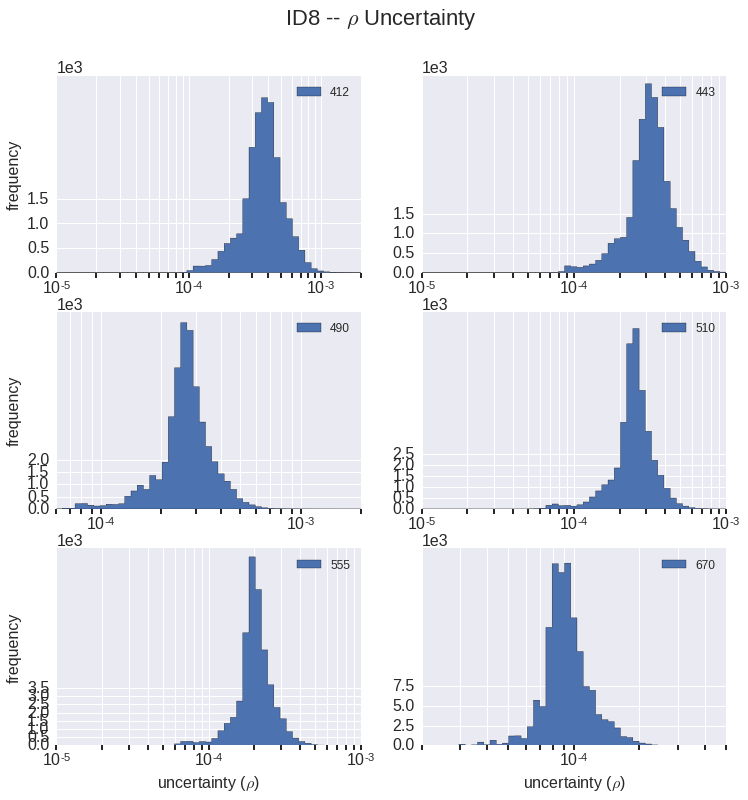

In [11]:
sb.set_style('dark')
rcParams['xtick.minor.visible'] = True
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 2
rcParams['xtick.direction'] = 'Down'
minorLocator=LogLocator(subs=np.arange(2,11)/10)
fig,axs = pl.subplots(nrows=3,ncols=2,figsize=(12,12))
rngDict={'412':(1e-5,2e-3),'443':(1e-5,1e-3),'490':(6e-5,2e-3),
         '510':(1e-5,1e-3),'555':(1e-5,1e-3),'670':(2e-5,5e-4)}
yTicDict={'412':np.arange(0,1.6e3,5e2),'443':np.arange(0,2e3,5e2),
          '490':np.arange(0,2.2e3,5e2),'510':np.arange(0,3e3,5e2),
          '555':np.arange(0,3.6e3,5e2),'670':np.arange(0,8e3,2.5e3)}
for i,(bnd,ax) in enumerate(zip(bands2check,axs.ravel())):
    ytic=yTicDict[bnd]
    rrsRng=rngDict[bnd]
    logbins=np.logspace(np.log10(rrsRng[0]),np.log10(rrsRng[1]),50)
    ax.hist(rhoUncDict[bnd],bins=logbins,normed=True,range=rrsRng,
                  histtype='stepfilled',label=bnd)
    ax.set_xlim(rrsRng)
    ax.yaxis.set_ticks(ytic)
    ax.set_xscale('log')
    ax.legend(loc='best',fontsize=12)
    
    if i%2==0:
        ax.set_ylabel('frequency',fontsize=fontSize)
    if i >3:
        ax.set_xlabel('uncertainty ' +  r'($\rho$)',fontsize=fontSize)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True,which='major')
    ax.ticklabel_format(axis='y',style='sci',scilimits=(1,3))
    ax.xaxis.set_minor_locator(minorLocator)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
fig.suptitle('ID8 -- ' + r'$\rho$' + ' Uncertainty', fontsize=22)   
fig.savefig(mainDir + 'PACEREVIEW_160331/May12_2016/ID8histsLogx.png')

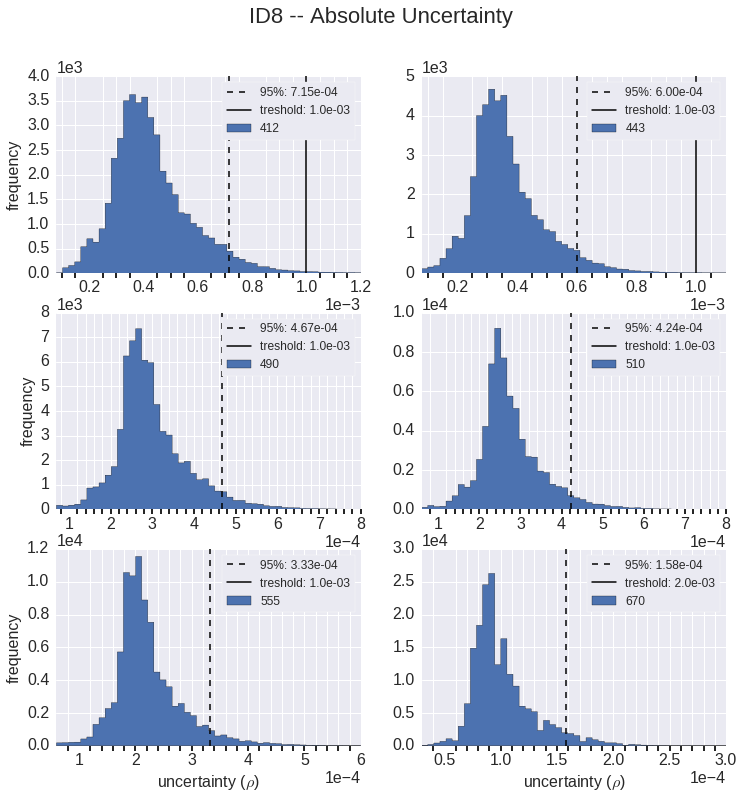

In [38]:
sb.set_style('dark')
rcParams['xtick.minor.visible'] = True
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 2
rcParams['xtick.direction'] = 'Down'
#minorLocator=LogLocator(subs=np.arange(2,11)/10)
fig,axs = pl.subplots(nrows=3,ncols=2,figsize=(12,12))
threshList=[0.001]*5+[0.002]
rngDict={'412':(8e-5,1.2e-3),'443':(8e-5,1.1e-3),'490':(7e-5,8e-4),
         '510':(6e-5,8e-4),'555':(6e-5,6e-4),'670':(3e-5,3e-4)}
yTicDict={'412':np.arange(0,1.6e3,5e2),'443':np.arange(0,2e3,5e2),
          '490':np.arange(0,2.2e3,5e2),'510':np.arange(0,3e3,5e2),
          '555':np.arange(0,3.6e3,5e2),'670':np.arange(0,8e3,2.5e3)}
for i,(bnd,ax) in enumerate(zip(bands2check,axs.ravel())):
    ytic=yTicDict[bnd]
    rhoRng=rngDict[bnd]
    rhoSorted = np.sort(rhoUncDict[bnd])
    rho95 = rhoSorted[int(np.floor(rhoSorted.size * .95))]
    ax.hist(rhoUncDict[bnd],bins=50,normed=True,range=rhoRng,
                  histtype='stepfilled',label=bnd)
    ax.axvline(x=rho95,color='k',lw=1.5,ls='--',label="%s %.2e" %('95%:',rho95))
    thresh=threshList[i]
    ax.axvline(x=thresh,color='k',lw=1.5,label="treshold: %.1e" % thresh)
    ax.set_xlim(rhoRng)
    #ax.yaxis.set_ticks(ytic)
    ax.legend(loc='upper right',fontsize=12,frameon=True)
    
    if i%2==0:
        ax.set_ylabel('frequency',fontsize=fontSize)
    if i >3:
        ax.set_xlabel('uncertainty ' +  r'($\rho$)',fontsize=fontSize)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True,which='major')
    ax.ticklabel_format(axis='both',style='sci',scilimits=(1,3))
    #ax.xaxis.set_minor_locator(minorLocator)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
fig.suptitle('ID8 -- Absolute Uncertainty', fontsize=22)   
fig.savefig(mainDir + 'PACEREVIEW_160331/May12_2016/ID8hists.png')

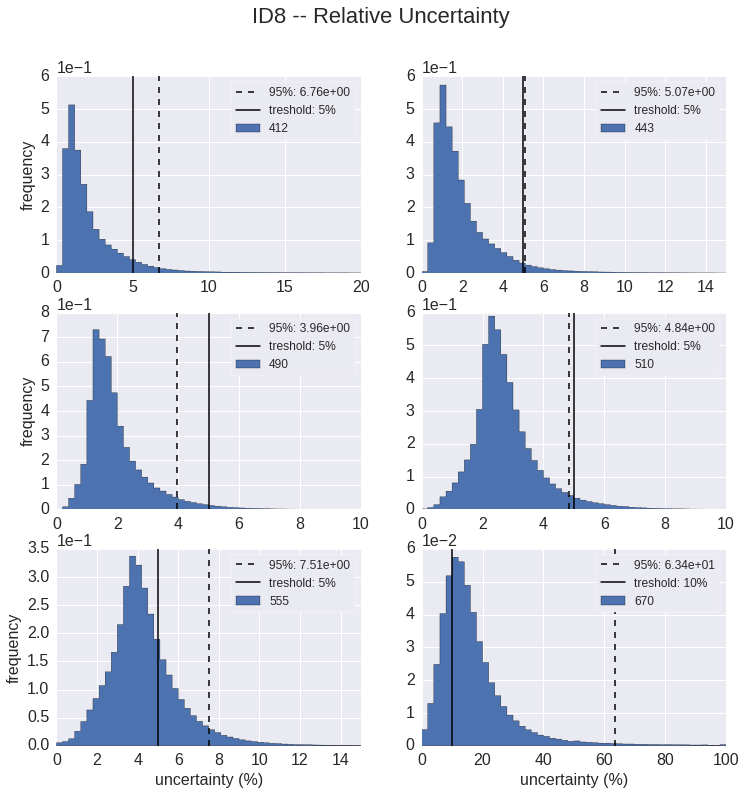

In [37]:
# PERCENT UNCERTAINTY
fig,axs = pl.subplots(nrows=3,ncols=2,figsize=(12,12))
threshList=[5]*5+[10]
rngDict={'412':(0,20),'443':(0,15),'490':(0,10),
         '510':(0,10),'555':(0,15),'670':(0,100)}
yTicDict={'412':np.arange(0,1.6e3,5e2),'443':np.arange(0,2e3,5e2),
          '490':np.arange(0,2.2e3,5e2),'510':np.arange(0,3e3,5e2),
          '555':np.arange(0,3.6e3,5e2),'670':np.arange(0,8e3,2.5e3)}
for i,(bnd,ax) in enumerate(zip(bands2check,axs.ravel())):
    ytic=yTicDict[bnd]
    rhoRng=rngDict[bnd]
    rhoPerc = rhoUncDict[bnd] / rhoDict[bnd] * 100
    rhoSorted = np.sort(rhoPerc)
    rho95 = rhoSorted[int(np.floor(rhoSorted.size * .95))]
    ax.hist(rhoPerc,bins=50,normed=True,range=rhoRng,
                  histtype='stepfilled',label=bnd)
    ax.axvline(x=rho95,color='k',lw=1.5,ls='--',label="%s %.2e" %('95%:',rho95))
    thresh=threshList[i]
    ax.axvline(x=thresh,color='k',lw=1.5,label="treshold: %d%%" % thresh)
    ax.set_xlim(rhoRng)
    #ax.yaxis.set_ticks(ytic)
    ax.legend(loc='best',fontsize=12,frameon=True)
    
    if i%2==0:
        ax.set_ylabel('frequency',fontsize=fontSize)
    if i >3:
        ax.set_xlabel('uncertainty ' +  r'(%)',fontsize=fontSize)
    ax.xaxis.grid(True, which='major')
    ax.yaxis.grid(True,which='major')
    ax.ticklabel_format(axis='both',style='sci',scilimits=(0,3))
    #ax.xaxis.set_minor_locator(minorLocator)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
fig.suptitle('ID8 -- Relative Uncertainty', fontsize=22)   
fig.savefig(mainDir + 'PACEREVIEW_160331/May12_2016/ID8PercHists.png')